In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data={'Names':['Ram','Laxman',np.nan,'Sita'],
     'Ages':[np.nan,23,22,21],
     'City':['Hyd','Blr','Pune',np.nan]}
df=pd.DataFrame(data)

In [3]:
df               # NAN: not a number (np.nan)

,Names,Ages,City
0,Ram,NaN,Hyd
1,Laxman,23.0,Blr
2,NaN,22.0,Pune
3,Sita,21.0,NaN


In [4]:
df.shape

(4, 3)

In [5]:
df.isnull()

,Names,Ages,City
0,False,True,False
1,False,False,False
2,True,False,False
3,False,False,True


In [6]:
df.isnull().sum()

Names    1
Ages     1
City     1
dtype: int64

$method-1$

**fill with a random value**

In [7]:
df.fillna(40)

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [8]:
df

,Names,Ages,City
0,Ram,NaN,Hyd
1,Laxman,23.0,Blr
2,NaN,22.0,Pune
3,Sita,21.0,NaN


In [9]:
df.fillna(40,inplace=True)

In [10]:
df

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


$method-2$

In [11]:
df.dtypes

Names     object
Ages     float64
City      object
dtype: object

In [12]:
# select a particular column and fill with random number
df['Ages'].fillna(20,inplace=True)
df

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [13]:
df['Names'].fillna('Krishna',inplace=True)
df['City'].fillna('Chennai',inplace=True)
df

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


$method-3$
**pad**

In [14]:
df

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [15]:
df.fillna(method='pad')

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [16]:
df.fillna(method='backfill')

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [17]:
df.fillna(method='bfill')

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


In [18]:
df.fillna(method='ffill')

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


$method-4$

In [19]:
#Axis=0  rows    fill using axis
#axis=1  columns
df.fillna(method='pad',axis=1)

,Names,Ages,City
0,Ram,40.0,Hyd
1,Laxman,23.0,Blr
2,40,22.0,Pune
3,Sita,21.0,40


$method-5$


**fill the missing value using mean,median,mode**

In [20]:
mean_age=df['Ages'].mean()
mean_age

26.5

In [21]:
df['Ages'].fillna(mean_age)

0    40.0
1    23.0
2    22.0
3    21.0
Name: Ages, dtype: float64

In [22]:
median_age=df['Ages'].median()
median_age

22.5

In [23]:
df['Ages'].fillna(median_age)

0    40.0
1    23.0
2    22.0
3    21.0
Name: Ages, dtype: float64

$dealing-outliers$

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)

In [26]:
wage_data=visadataset['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

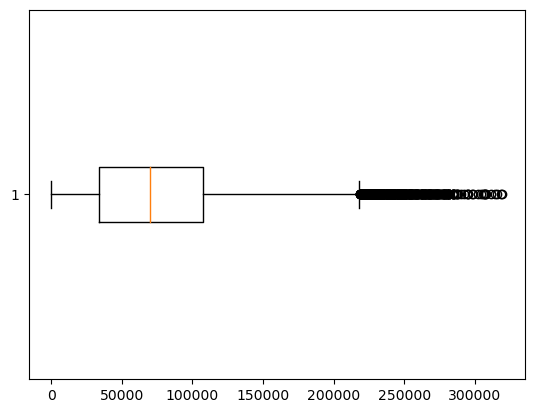

In [27]:
data=visadataset['prevailing_wage']
plt.boxplot(data,vert=False)
plt.show()


In [28]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

con1=wage_data<LB
con2=wage_data>UB
con1|con2
outliers_data=visadataset[con1|con2]

In [29]:
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [30]:
len(outliers_data)

427

In [31]:
(len(outliers_data)/len(visadataset))*100

1.6758241758241759

In [32]:
427/25480

0.016758241758241758

In [33]:
len(visadataset)-len(outliers_data)

25053

In [34]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

con1=wage_data<LB
con2=wage_data>UB
con1|con2
outliers_data=visadataset[con1|con2]

con1=wage_data>LB
con2=wage_data
non_outliers_data=visadataset[con1&con2]

In [35]:
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$filloutliers-data-with-median-values$

- Step-1: Fill ouliers data with median value
    
- Step-2: Merge two data frames non outliers data and outliers data

In [36]:
outliers_data['prevailing_wage']

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [37]:
outliers_data['prevailing_wage'].to_list()

[220081.73,
 225569.73,
 247393.01,
 269321.68,
 219529.62,
 232227.33,
 238691.32,
 220448.17,
 230750.48,
 235339.91,
 232680.65,
 256261.78,
 262189.0,
 250510.67,
 218554.78,
 256205.38,
 221944.22,
 229950.7,
 222628.84,
 229819.69,
 233641.72,
 274019.43,
 218982.83,
 230984.28,
 223128.23,
 246705.0,
 240266.34,
 226090.72,
 231949.27,
 254604.08,
 288318.91,
 244457.48,
 242146.48,
 247545.23,
 234139.17,
 231834.72,
 222730.57,
 239773.63,
 220553.95,
 237539.32,
 266440.49,
 277281.01,
 275627.59,
 249291.12,
 292106.59,
 234012.11,
 247009.24,
 267726.09,
 222098.09,
 280661.13,
 277984.52,
 262852.71,
 263877.21,
 230916.64,
 264760.64,
 267868.56,
 222221.67,
 242406.32,
 276894.08,
 281832.93,
 221033.57,
 258292.84,
 223492.85,
 245418.67,
 250289.08,
 271344.69,
 252825.11,
 230843.7,
 253668.86,
 245819.17,
 239465.3,
 236316.36,
 225268.13,
 228941.33,
 306021.96,
 228074.25,
 270799.93,
 221982.69,
 256903.7,
 242813.07,
 253111.05,
 268440.33,
 225681.78,
 233150.41

In [38]:
visadataset['prevailing_wage']

# We seperated non outliers data(25053) and outliers data(427)
# Fill the prevailing_wage values of outliers data(427) with medain original dataset
# Then combine both non outliers data(25053) and filled outliers data(427)===> 25480

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [39]:
median_wage=visadataset['prevailing_wage'].median()
median_wage

original_wage=visadataset['prevailing_wage'].to_list()
original_wage[:10]

outliers_wage=outliers_data['prevailing_wage'].to_list()
len(outliers_wage)

427

***impute outliers with median***

***np.where***

In [40]:
if <condition>:
    # st1
    # st2

else:
    # st1
    
np.where(<condition>,a,b)

SyntaxError: invalid syntax (1181303203.py, line 1)

In [41]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

visadataset[visadataset['prevailing_wage']>UB]

con=visadataset['prevailing_wage']>UB
median=visadataset['prevailing_wage'].median()
visadataset['prevailing_wage']=np.where(con,median,visadataset['prevailing_wage'])
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [42]:
l1=[1,2,3]
l2=['A','B','C']
df=pd.DataFrame(zip(l1,l2),
               columns=['Col1','Col2'])
df

,Col1,Col2
0,1,A
1,2,B
2,3,C


In [43]:
df['Col1']>2

0    False
1    False
2     True
Name: Col1, dtype: bool

In [44]:
con=df['Col1']>2

df['Col1']=np.where(con,100,df['Col1'])

In [45]:
df

,Col1,Col2
0,1,A
1,2,B
2,100,C


In [46]:
median=visadataset['prevailing_wage'].median()

cond=visadataset['prevailing_wage']>UB

visadataset['prevailing_wage']=np.where(cond,median,visadataset['prevailing_wage'])

visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [47]:
visadataset['prevailing_wage'] = np.where(con2, 
                                           visadataset['prevailing_wage'].median(), 
                                           visadataset['prevailing_wage'])

In [48]:
con1=visadataset['prevailing_wage']>UB
median_wage=visadataset['prevailing_wage'].median()
visadataset['prevailing_wage']=np.where(con1,median_wage,visadataset['prevailing_wage'])
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,70308.05,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,70308.05,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,70308.05,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,70308.05,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,70308.05,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,70308.05,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.05,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,70308.05,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,70308.05,Year,Y,Certified


In [49]:
md=visadataset['prevailing_wage'].median()
con1=visadataset['prevailing_wage']>UB
visadataset['prevailing_wage']=np.where(con1,md,visadataset['prevailing_wage'])
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,70308.05,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,70308.05,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,70308.05,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,70308.05,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,70308.05,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,70308.05,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.05,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,70308.05,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,70308.05,Year,Y,Certified


In [50]:
con=df['Col2']=='A'

In [51]:
con

0     True
1    False
2    False
Name: Col2, dtype: bool

# ***convert catagorical columns to numerical columns***

**Convert categorical to numerical data**

- Before we develop ML algorithm , It is very important to do

- ML algorithms developed Maths

- Map

- np.where

- pd.getDummies

- LabelEncoder


In [52]:
import numpy as np
import pandas as pd

In [53]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [54]:
cat,num=[],[]
for key,values in dict(visadataset.dtypes).items():
    if values=='O':
        cat.append(key)
    else:
        num.append(key)
cat,num        

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [55]:
categorical=[key for key,values in dict(visa_dataset.dtypes).items() if values=="object"]
numeric=[key for key,values in dict(visa_dataset.dtypes).items() if values!="object"]
print(categorical,numeric)

NameError: name 'visa_dataset' is not defined

In [ ]:
# Case_status is a categorical column
visadataset['case_status'].unique()
# How many labels are there
# In case_status two labels are there
#      Denied =0
#      Certified=1

In [ ]:
# Create a dictionary with
# Denied =0
# Certified=1

dict1={'Denied':0,'Certified':1}

In [ ]:
visadataset['case_status'].map(dict1)

In [ ]:
visadataset.columns

In [56]:
visadataset.shape

(25480, 12)

In [57]:
list1=[i for i in range(25480)]
len(list1)

25480

In [58]:
visadataset['Number']=list1

In [59]:
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Number
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,2
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,3
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,25475
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,25476
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,25477
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,25478


In [60]:
visadataset['Number2']=2

In [61]:
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Number,Number2
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0,2
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1,2
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,2,2
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,3,2
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,25475,2
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,25476,2
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,25477,2
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,25478,2


In [62]:
visadataset.drop('Number',axis=1,inplace=True)

In [63]:
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Number2
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,2
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,2
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,2
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,2
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,2
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,2
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,2
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,2


In [64]:
visadataset.drop('Number2',axis=1,inplace=True)

In [65]:
visadataset.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [66]:
list1=[i for i in range(25480)]
visadataset['Number1']=list1
visadataset['Number2']=2

In [67]:
visadataset.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'Number1', 'Number2'],
      dtype='object')

In [68]:
visadataset.drop('Number1',axis=1,inplace=True)
visadataset.drop('Number2',axis=1,inplace=True)

In [69]:
visadataset.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [70]:
visadataset['case_status'].unique()
dict1={'Denied':0,'Certified':1}
visadataset['case_status']=visadataset['case_status'].map(dict1)

In [71]:
#visadataset.drop('case_status1',axis=1,inplace=True)
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [72]:
list1=['Ram','Sita','Laxman']
list2=[25,22,20]

dict1={'Ram':25,'Sita':22,'Laxman':20}

In [73]:
list1=['Ram','Sita','Laxman']
list2=[25,22,20]

dict1={list1[i]:list2[i] for i in range(len(list1))}
dict1    

{'Ram': 25, 'Sita': 22, 'Laxman': 20}

In [74]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
keys=visadataset['case_status'].unique()
values=[i for i in range(len(keys))]
print(keys)
print(values)
# Dictonary comprehenshion
# If i give two list how to make dictionary

#{<key>:<value>  for loop}


['Denied' 'Certified']
[0, 1]


In [75]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [76]:
con=visadataset['case_status']=='Denied'
visadataset['case_status']=np.where(con,0,1)
visadataset
# Drawback : it applicable for only binary

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [77]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [78]:
visadataset['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [79]:
pd.get_dummies(visadataset['education_of_employee'])
# there 4 lables are there
# pd.get_dummies will create extra 4 columns
#  B   D    H   M
#  0   0    1   0
#  0   0    0   1

# ON-OFF  SET-RESET
# ON-OFF ====== > COS function
# COS0=1           COS90=0
#  0-degrees        90 

# both are perpendicular each other
# ortgonal each other
# 90 degrees phase shift
# there is no relation, independent each other

,Bachelor's,Doctorate,High School,Master's
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
25475,1,0,0,0
25476,0,0,1,0
25477,0,0,0,1
25478,0,0,0,1


***class 30 ****

In [80]:
visadataset['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

In [81]:
pd.get_dummies(visadataset['case_status'])

,Certified,Denied
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
25475,1,0
25476,1,0
25477,1,0
25478,1,0


In [82]:
df1=pd.get_dummies(visadataset,columns=['case_status'])
df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status_Certified,case_status_Denied
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1,0


In [83]:
df1.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status_Certified', 'case_status_Denied'],
      dtype='object')

In [84]:
visadataset.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [85]:
pd.get_dummies(visadataset,
              prefix='naresh_it',
              columns=['case_status'])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,naresh_it_Certified,naresh_it_Denied
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1,0


In [86]:
cat

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [87]:
len(cat)

9

In [88]:
cat[1:]

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [89]:
s=0
for i in cat[1:]:
    a=visadataset[i].nunique()
    
    s+=a
print(s)            # here 27 extra columns will created

27


In [90]:
visadataset.shape

(25480, 12)

***label encoder***

In [107]:
keys=visadataset['continent'].unique()
values=[i for i in range(len(keys))]
d={keys[i]:values[i] for i in range(len(keys))}
visadataset['continent'].map(d)
d

{'Asia': 0,
 'Africa': 1,
 'North America': 2,
 'Europe': 3,
 'South America': 4,
 'Oceania': 5}

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
visadataset['continent_new']=le.fit_transform(visadataset['continent'])


In [93]:
visadataset[['continent','continent_new']]

,continent,continent_new
0,Asia,1
1,Asia,1
2,Asia,1
3,Asia,1
4,Africa,0
...,...,...
25475,Asia,1
25476,Asia,1
25477,Asia,1
25478,Asia,1


In [94]:
visadataset['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [95]:
visadataset['continent_new'].unique()

array([1, 0, 3, 2, 5, 4])

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform()

TypeError: LabelEncoder.fit_transform() missing 1 required positional argument: 'X'

In [97]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
visadataset['continent_new']=le.fit_transform(visadataset['continent'])

visadataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,1


In [98]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
visadataset['continent']=le.fit_transform(visadataset['continent'])


In [99]:
converted=visadataset['continent'].values
original=le.inverse_transform(visadataset['continent'])

In [100]:
print(converted[:10])
print(original[:10])

[1 1 1 1 0 1 1 3 1 2]
['Asia' 'Asia' 'Asia' 'Asia' 'Africa' 'Asia' 'Asia' 'North America' 'Asia'
 'Europe']


In [101]:
file_name="C:\\Users\\Durga prasan sarangi\\jupyter\\naresh it\\data science omkar sir\\Visadataset.csv"
visadataset=pd.read_csv(file_name)
visadataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat[1:]:
    visadataset[i]=le.fit_transform(visadataset[i])
    
visadataset    

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,EZYV02,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,EZYV03,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,EZYV04,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,EZYV05,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,EZYV25477,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,EZYV25478,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,EZYV25479,1,3,1,1,1918,1887,4,86154.7700,3,1,0


In [102]:
keys=visadataset['continent'].unique()
values=[i for i in range(len(keys))]
d={keys[i]:values[i] for i in range(len(keys))}
visadataset['continent'].map(d)

0        0
1        0
2        0
3        0
4        1
        ..
25475    0
25476    0
25477    0
25478    0
25479    0
Name: continent, Length: 25480, dtype: int64